## TCS_Stock_Market_with ARIMA,SARIMA,SARIMAX And LSTM.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df = pd.read_csv("/content/sample_data/TCS_stock_history.csv")

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [22]:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

In [23]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2231.000000,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,1288.501455,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,0.000000,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,1115.500000,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2231.000000,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,3346.500000,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,4462.000000,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [24]:
# Make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='TCS Stock Price')
fig.show()

In [25]:
df = df[["Date", "Close"]]
df.head()

,Date,Close
0,0,29.519140
1,1,29.119476
2,2,27.111877
3,3,27.111877
4,4,27.046812


In [26]:
fig = px.line(df, x='Date', y='Close', title='TCS Stock Price')
fig.show()

In [27]:
# Stationarity check on Data
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
  result=adfuller(df)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  if result[1] <= 0.05:
    print('Reject null hypothesis and Data is Stationary')
  else:
    print('Fail to reject null hypothesis and Data is non-Stationary')

check_stationarity(df['Close'])

ADF Statistic: 4.790100
p-value: 1.000000
Fail to reject null hypothesis and Data is non-Stationary


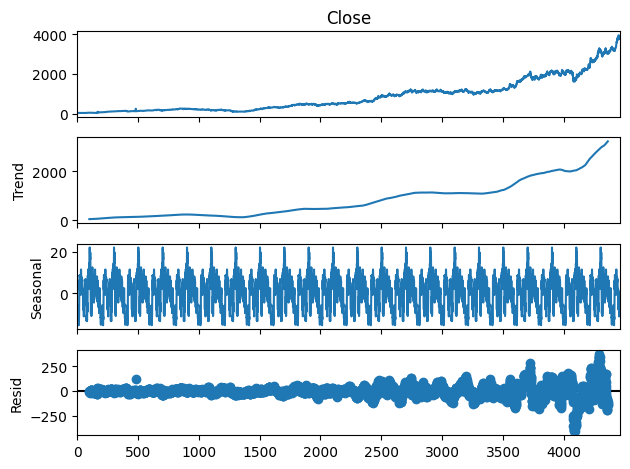

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=200)
decomposition.plot()
plt.tight_layout()
plt.show()

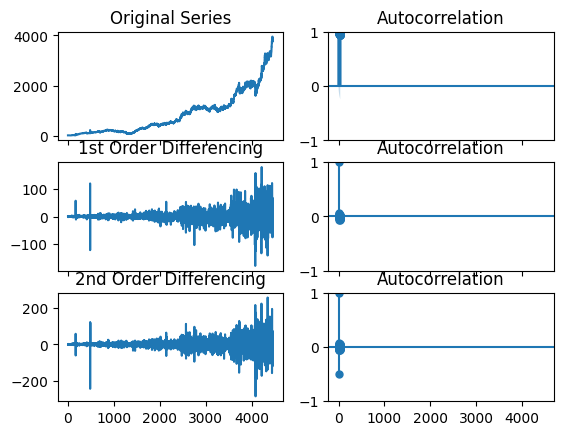

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig , axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(df['Close'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1,1])

# 2nd Differencing
axes[2,0].plot(df['Close'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2,1])

plt.show()

In [30]:
# lets define P,d,q
p = 1
d = 1
q = 1

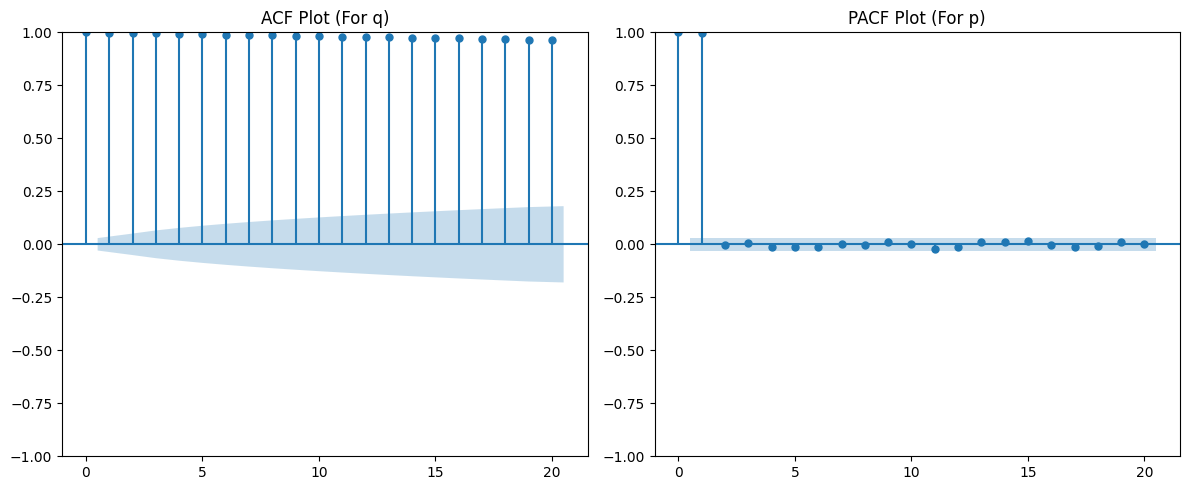

In [43]:
# Assume df['Close'] is the time series column
plt.figure(figsize=(12, 5))

# ACF Plot (for q)
plt.subplot(1, 2, 1)
plot_acf(df['Close'], ax=plt.gca(), lags=20)
plt.title("ACF Plot (For q)")

# PACF Plot (for p)
plt.subplot(1, 2, 2)
plot_pacf(df['Close'], ax=plt.gca(), lags=20)
plt.title("PACF Plot (For p)")

plt.tight_layout()
plt.show()

# Stats Models with **ARIMA**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4463
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19446.111
Date:                Thu, 05 Jun 2025   AIC                          38898.222
Time:                        09:59:21   BIC                          38917.432
Sample:                             0   HQIC                         38904.994
                               - 4463                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3440      0.159      2.162      0.031       0.032       0.656
ma.L1         -0.3779      0.157     -2.404      0.016      -0.686      -0.070
sigma2       357.2524      2.600    137.402      0.0

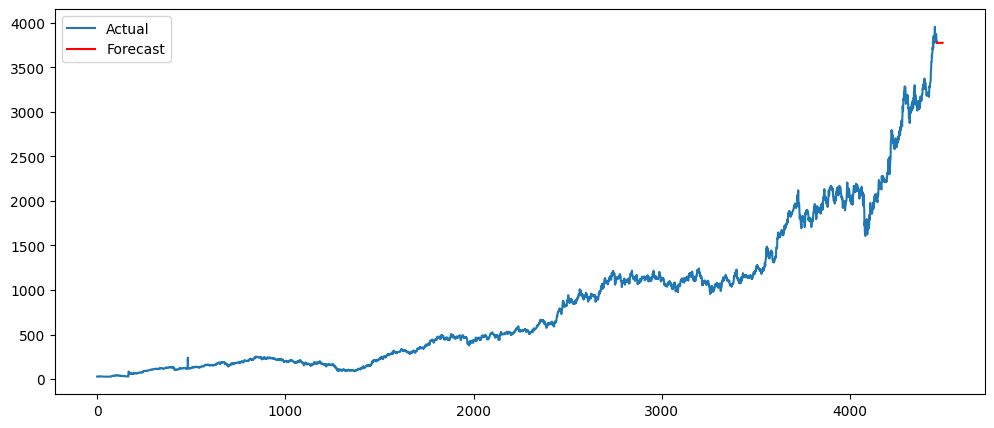

In [44]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 1,1,1
model = ARIMA(df['Close'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

# Predict Next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

## **Lets Run SARIMA**

In [45]:
import statsmodels.api as sm

p,d,q =  1,1,1

model = sm.tsa.statespace.SARIMAX(df['Close'],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4463
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -19415.103
Date:                            Thu, 05 Jun 2025   AIC                          38840.206
Time:                                    10:01:14   BIC                          38872.210
Sample:                                         0   HQIC                         38851.489
                                           - 4463                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3640      0.143      2.538      0.011       0.083       0.645
ma.L1         -0.4010      0.141   

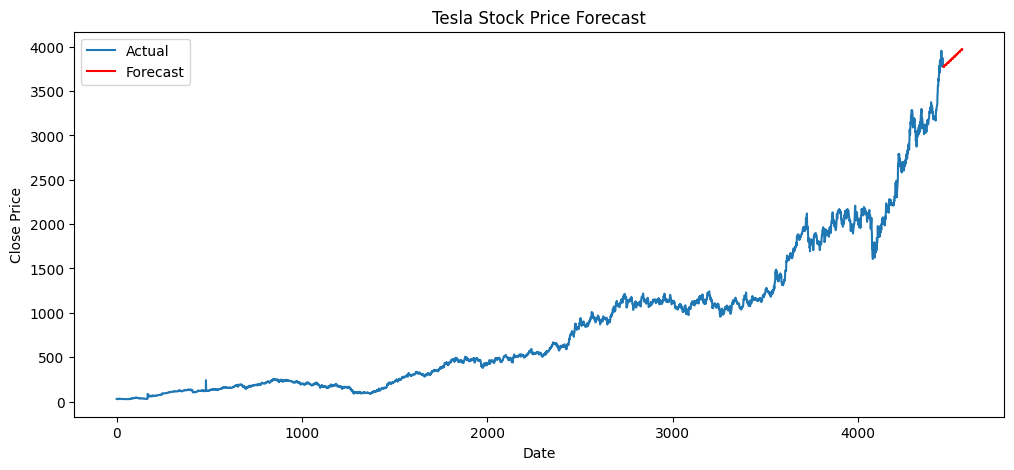

In [46]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+100)

# plot predictions
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ns will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ns will be used.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4463
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -19357.917
Date:                            Thu, 05 Jun 2025   AIC                          38725.834
Time:                                    10:01:52   BIC                          38757.821
Sample:                                01-01-1970   HQIC                         38737.113
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3640      0.141      2.578      0.010       0.087       0.641
ma.L1         -0.4014      0.139   

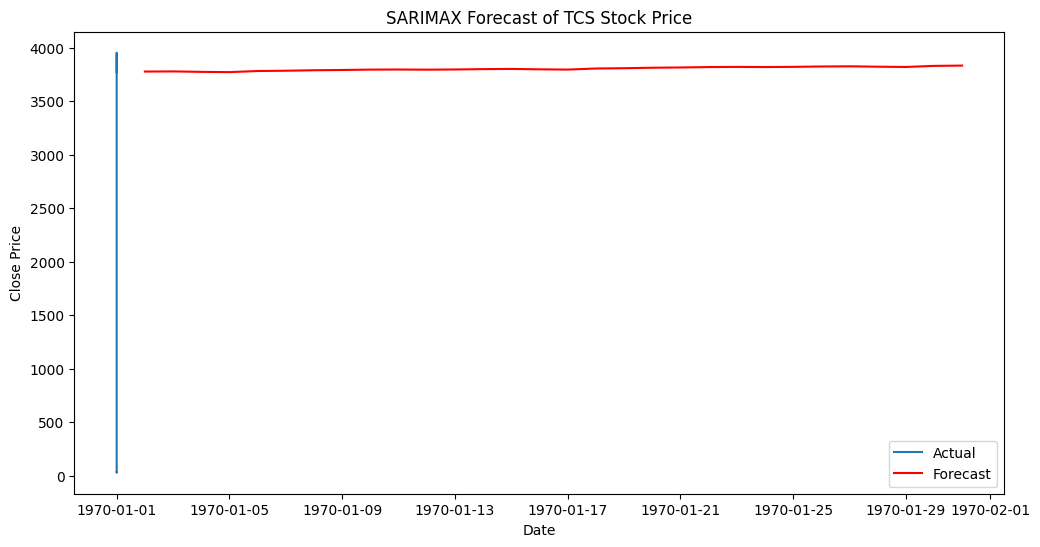

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Define the SARIMAX order
# (p,d,q) for ARIMA terms, (P,D,Q,s) for seasonal terms
# Example: ARIMA(1,1,1) + Seasonal(1,1,1,12)
model = sm.tsa.statespace.SARIMAX(
    df['Close'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Step 3: Fit the model
results = model.fit()
print(results.summary())

# Step 4: Forecast next 30 days
forecast = results.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]
forecast.index = future_dates

# Step 5: Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title("SARIMAX Forecast of TCS Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
